In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sys
sys.path.append("..")
import fastcat as fc

In [2]:
#photozs that we have
pzs=[]
pzs.append(("Gauss",fc.photoz.PhotoZGauss(0.02)))
pzs.append(("TwoPop",fc.photoz.PhotoZTwoPop(0.02,0.75,3.)))
pzs.append(("HiddenVar",fc.photoz.PhotoZHiddenVar(0.02,[0.1,0.2],[0.6,0.65])))
pzs.append(("Franzona",fc.photoz.PhotoZHist("/project/projectdirs/lsst/LSSWG/Franzona/pzdist.txt")))

Reading file...
Using pickled version of Franzona file!
done...


/home/anze/work/LSST/fastcat/fastcat/photoz_Hist.py:58: RuntimeWarning: invalid value encountered in divide
  self.dataset[:, 3:] = (np.where(integrals!=0., self.dataset[:, 3:].T/integrals, 0.)).T


In [3]:
ztrues=np.array([0.1,0.4,0.62,0.8,1.0])
zar=np.linspace(0,1.4,1000)

Applying PZs
[(0.12537045776844025, 0.02199999988079071)]
Applying PZs
[(0.11551084369421005, 0.08799999952316284)]
Applying Hidden Var PZs
[(1.2098379135131836, 1.6665028133879962)]
[(0.10000000149011612, 2, 0, 20)]
Applying PZs
[(0.39173388481140137, 0.0279999990016222)]
Applying PZs
[(0.37149855494499207, 0.0279999990016222)]
Applying Hidden Var PZs
[(12.484546661376953, 13.436857770139383)]
[(0.4000000059604645, 8, 2, 1)]
Applying PZs
[(0.5736940503120422, 0.03240000084042549)]
Applying PZs
[(0.7416508197784424, 0.12960000336170197)]
Applying Hidden Var PZs
[(-1.4533785581588745, 16.31725479828878)]
[(0.6200000047683716, 12, 1, 60)]
Applying PZs
[(0.7587755918502808, 0.035999998450279236)]
Applying PZs
[(0.8252179622650146, 0.035999998450279236)]
Applying Hidden Var PZs
[(1.7137155532836914, 3.1556359014179787)]
[(0.800000011920929, 16, 0, 47)]
Applying PZs
[(1.0361881256103516, 0.03999999910593033)]
Applying PZs
[(0.9894363880157471, 0.1599999964237213)]
Applying Hidden Var PZs
[(

/home/anze/local/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide


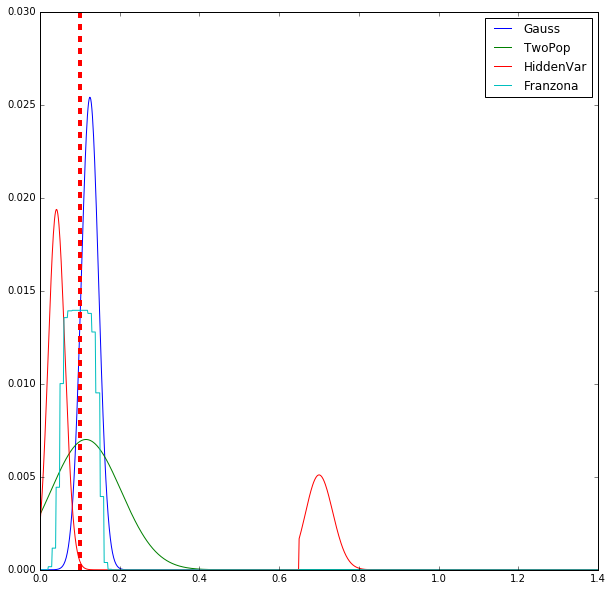

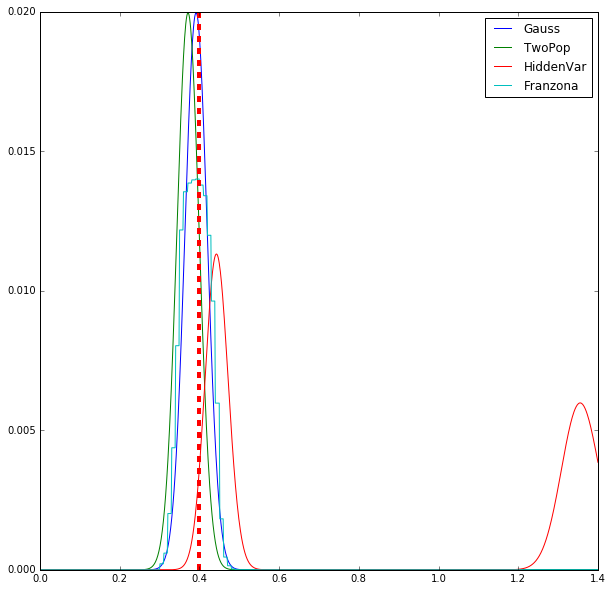

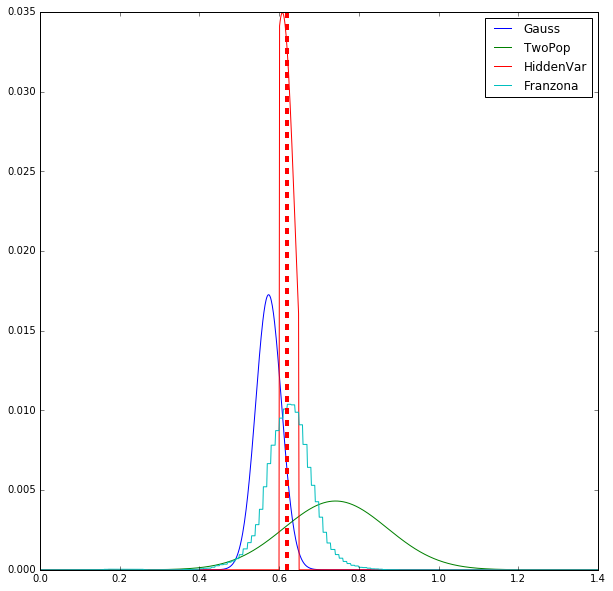

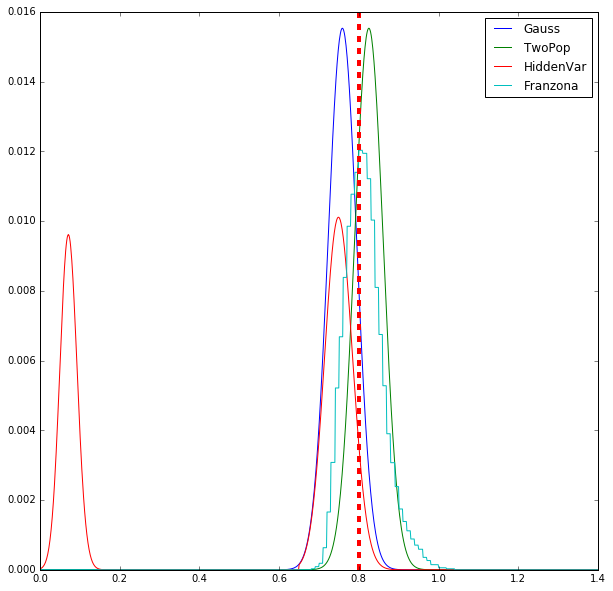

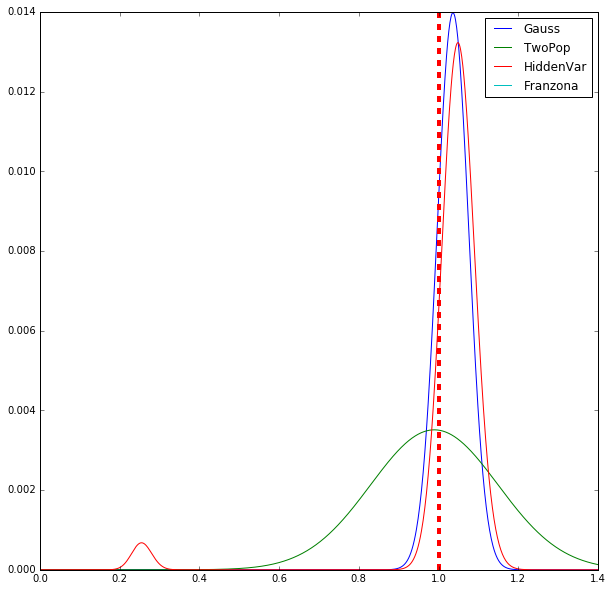

In [5]:
for ztrue in ztrues:
    plt.figure(figsize=(10,10))
    for name,pz in pzs:
        arr=np.array(np.array([ztrue]),dtype=[('z',np.float32)])
        arr=pz.applyPhotoZ(arr)
        print arr
        p=np.array([pz.PofZ(arr,float(z),0.1) for z in zar])
        p/=p.sum()
        plt.plot(zar,p,label=name)
    plt.legend()
    ymin,ymax=plt.ylim()
    plt.plot([ztrue,ztrue],[ymin,ymax],'r--',lw=4)
    plt.ylim(ymin,ymax)
    